IMPORTING LIBRARIES

In [217]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



LOADING THE DATASET


In [218]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\hotel_bookings 2.csv")

#### Exploratory data analysis and data cleaning

In [219]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [220]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [221]:
df.shape

(119390, 32)

In [222]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [223]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], dayfirst=True)


In [224]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

 ###### Here the firstly we observed the data type of reservation status date as object so we converted the datatype to date time for efficiency

In [225]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [226]:
for columns in df.describe(include="object"):
    print(columns)
    print(df[columns].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [227]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [228]:
df.drop(['agent','company'], axis=1,inplace=True)

In [229]:
df.dropna(inplace=True)

###### Here we have dropped columns agent and company as it was a lot of empty values and this columns are not needed for the analysis too.
###### And also rows having null values are also eliminated


In [230]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [231]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


###### It shows the summary statistics of numerical columns. It is observed that it contains a lot of outliers . Most visible outlier is found in adr where min is -6.3800 and max is 5400.00 so it needs to be removed.

In [232]:
df=df[df['adr']<5000]

Here the data in adr in df is compared with 5000 and output is given as true or false and is returned after comparing

In [233]:
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

#### DATA ANALYSIS and DATA VISUALIZATION

In [234]:
canceleld_percentage=df['is_canceled'].value_counts(normalize = True)
print(canceleld_percentage)

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


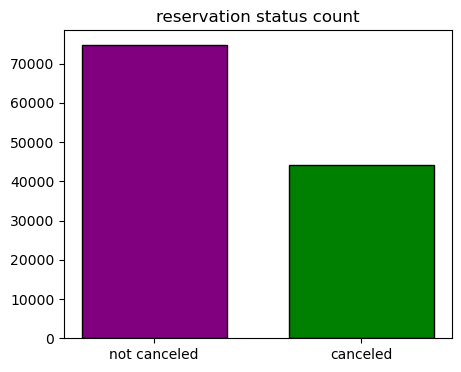

In [235]:
plt.figure(figsize=(5,4))
plt.title('reservation status count')
plt.bar(['not canceled','canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7, color=['purple', 'green'])
plt.show()

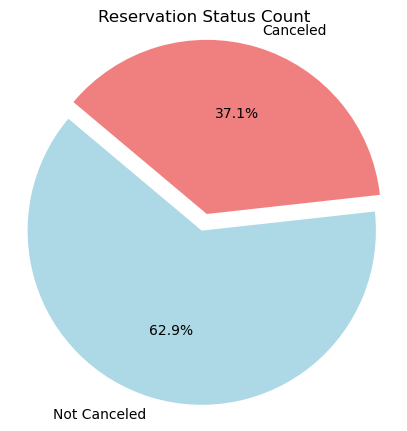

In [236]:
labels = ['Not Canceled', 'Canceled']
sizes = df['is_canceled'].value_counts()
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(5, 5))
plt.title('Reservation Status Count')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

###### From visualizing in both bar and pie chart we fond that even though 37% seems to be less it is more than half of the not cancelled rooms ,thus its a huge loss

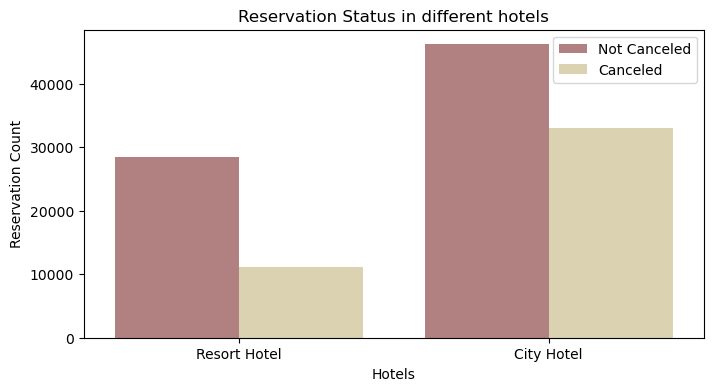

In [237]:
plt.figure(figsize=(8,4))
axl=sns.countplot(x='hotel',hue='is_canceled',data=df,palette="pink")
legend_label,_=axl.get_legend_handles_labels()
plt.title('Reservation Status in different hotels')
plt.xlabel('Hotels')
plt.ylabel('Reservation Count')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()


###### The count plot helps visualize the distribution of reservations across different hotels and how many were canceled versus not canceled.
###### The hue parameter (is_canceled) allows you to compare two categories (canceled vs. not canceled) within each hotel category.
###### This visual representation is useful for quickly understanding the relationship between hotel types and cancellation rates, helping in data analysis and decision-making.
###### Here the ratio between canceled and not canceled is found low in city hotels when compared to resort hotels
##### We can see that resort hotels are having less cancelation rated compared to city hotels depicting  the expensiveness being one major factor of high cancelation in city hotels.

In [238]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

Here it is observed that 28 % of total bookings in resort are canceled

In [239]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

Here it is observed that 42 % of total bookings in resort are canceled

In [240]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

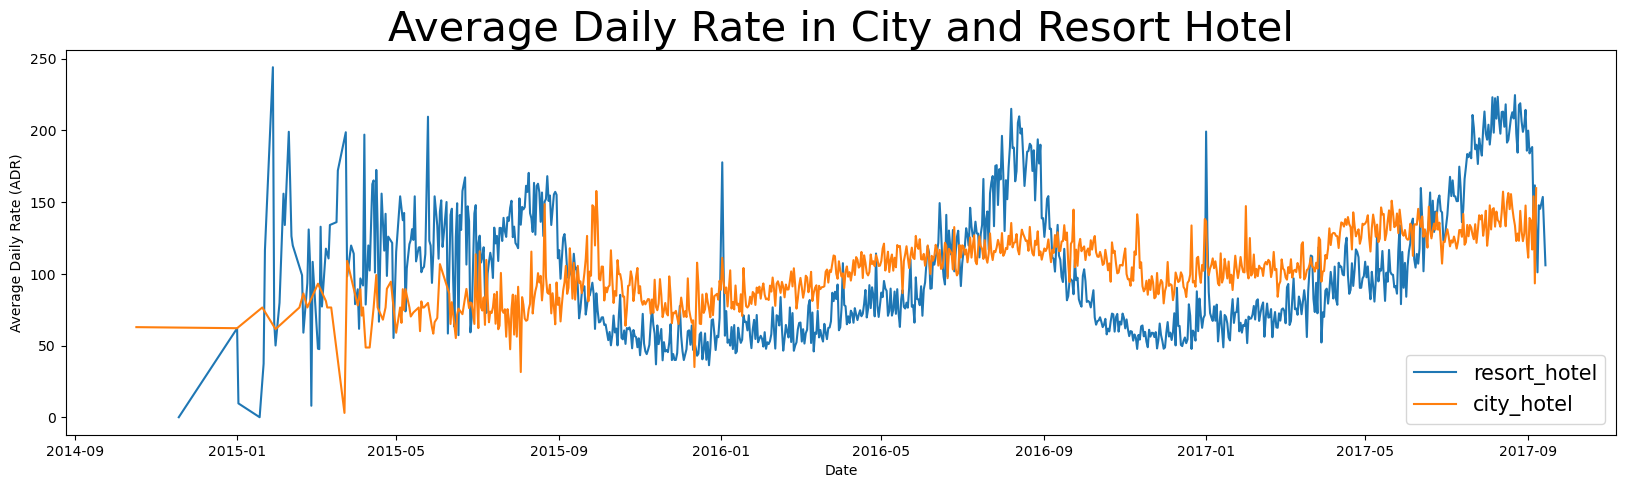

In [241]:
plt.figure(figsize=(20, 5))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label= 'resort_hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label= 'city_hotel')
plt.xlabel('Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(fontsize=15)
plt.show()


##### Helps hotel management to understand how ADR changes over time, enabling them to adjust pricing strategies to maximize revenue.
##### Identifies high and low seasons, allowing for dynamic pricing based on demand patterns.
##### By analyzing ADR trends, hotels can forecast demand and prepare operationally (staffing, inventory management, etc.)
##### Evaluates the impact of marketing campaigns or promotions on ADR.
##### We observe  the performance of resort hotels versus city hotels in terms of ADR.
##### City hotel lines are in mid compared to resort hotels and certain spiikes are observed in  resort hotels indicating increase in price during the weekends.
###### At certain days the price of city hotels are less when compared to resort hotels.


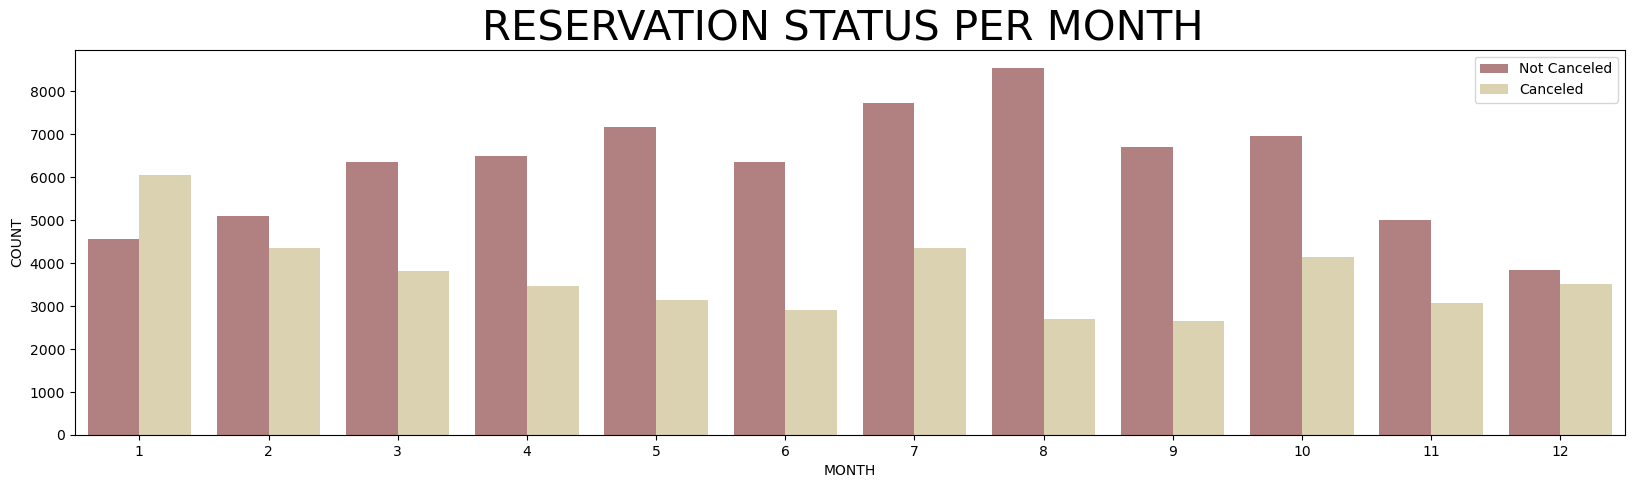

In [270]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(20, 5))
axl=sns.countplot(x='month',hue='is_canceled',data=df,palette="pink")
plt.legend(['Not Canceled', 'Canceled'])
plt.title('RESERVATION STATUS PER MONTH ',fontsize=30)

plt.xlabel("MONTH")
plt.ylabel("COUNT")
plt.show()

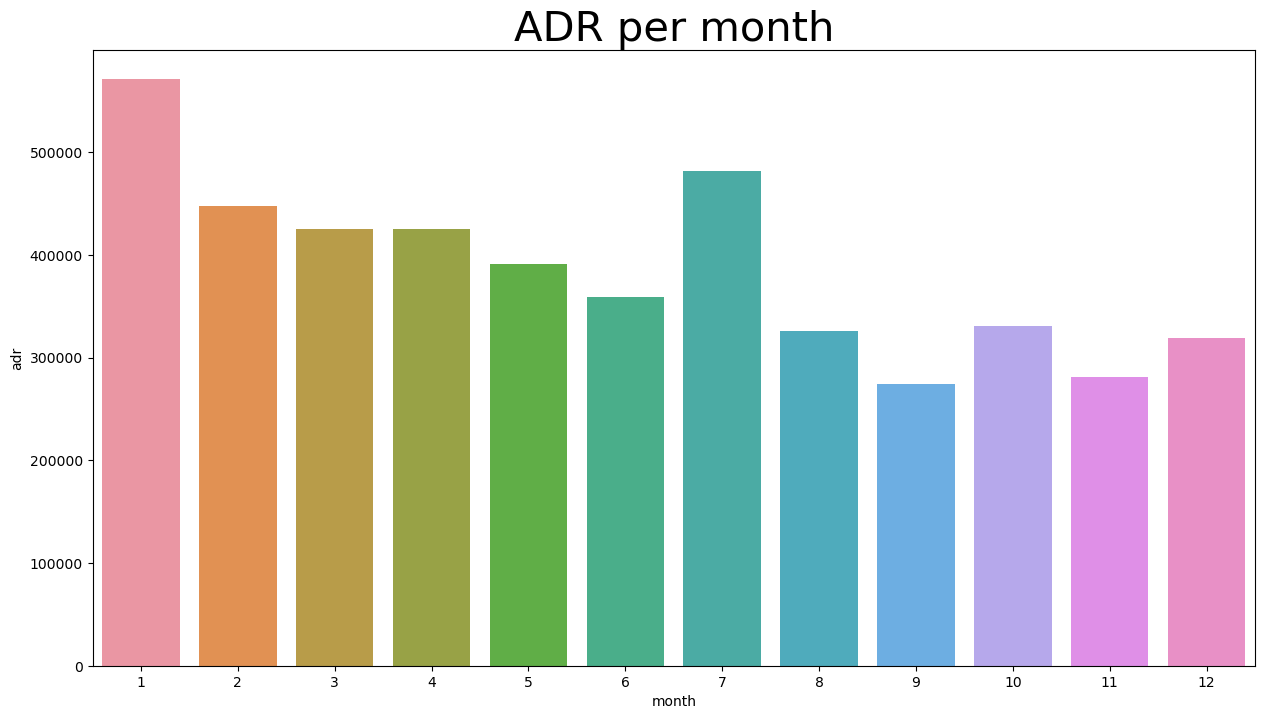

In [243]:
plt.figure(figsize=(15, 8))
plt.title('ADR per month',fontsize=30)
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

###### It is observed that JANUARY has highest cancellation while AUGUST has least cancellation.
###### It shows that as price gets higher the more will be the cancellation rate.

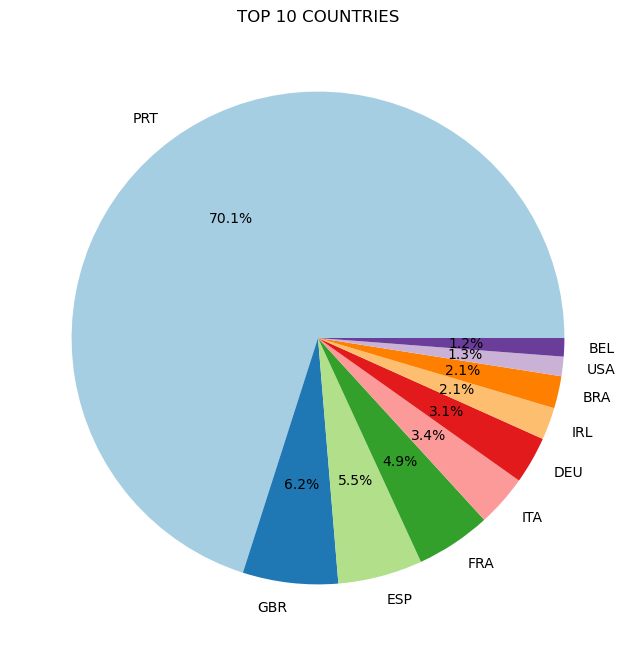

In [244]:
cancelled_data=df[df['is_canceled'] == 1]
top_country=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8, 8))
plt.title('TOP 10 COUNTRIES')
colors = plt.cm.Paired(range(len(top_country)))
plt.pie(top_country, labels=top_country.index, colors=colors, autopct='%1.1f%%')
plt.show()

 ###### From the above pie chart is it is observed that PORTUGUESE has the highest booking cancellation while USA,BELGIUM,BRAZIL being the least. 
###### So PORTUGUESE must address the issues to reduce cancellations:-
###### 1.Tailor marketing efforts to address concerns or preferences of customers from these countries.
###### 2.Offer promotions or incentives to reduce cancellations.
###### 3.Adjust booking and cancellation policies for guests from these countries to mitigate potential revenue loss.
###### 4.Enhance communication and provide more flexible booking options to encourage retention and reduce cancellations

In [245]:
df['market_segment'].value_counts()



market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [246]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

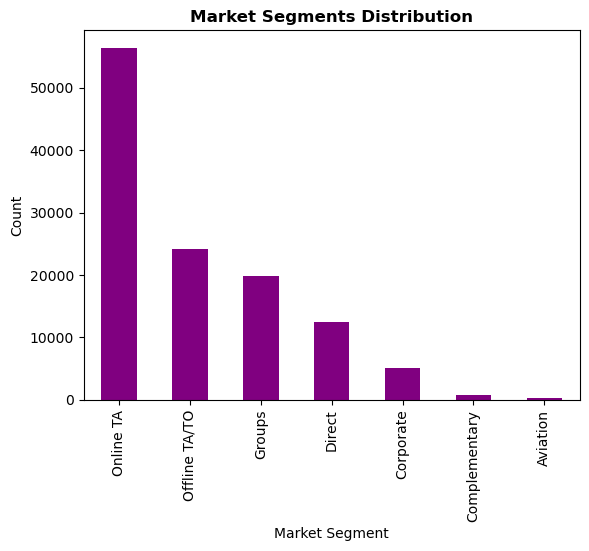

In [247]:
df["market_segment"].value_counts().plot(kind="bar" , color="purple")
plt.title("Market Segments Distribution" , fontweight="bold")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.show()

In [248]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

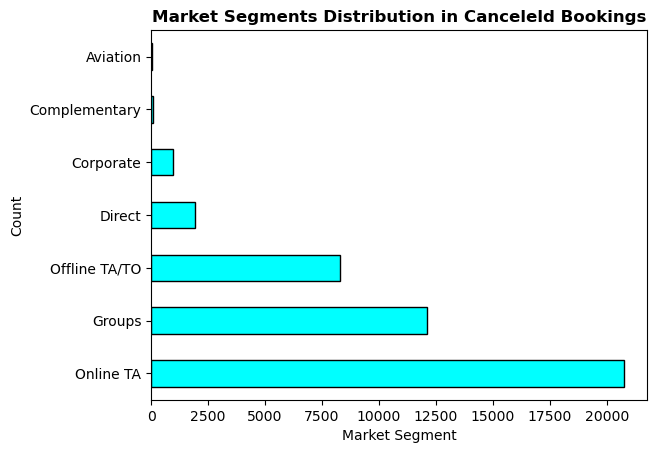

In [249]:
cancelled_data["market_segment"].value_counts().plot(kind="barh" , color="cyan",edgecolor='black')
plt.title("Market Segments Distribution in Canceleld Bookings" , fontweight="bold")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.show()

##### The hypothesis assuming the cancellations are mostly found in offline travel agents  appears to be false.

Now lets compare which reservation rates are higher the canceleld  data or not cancelled data


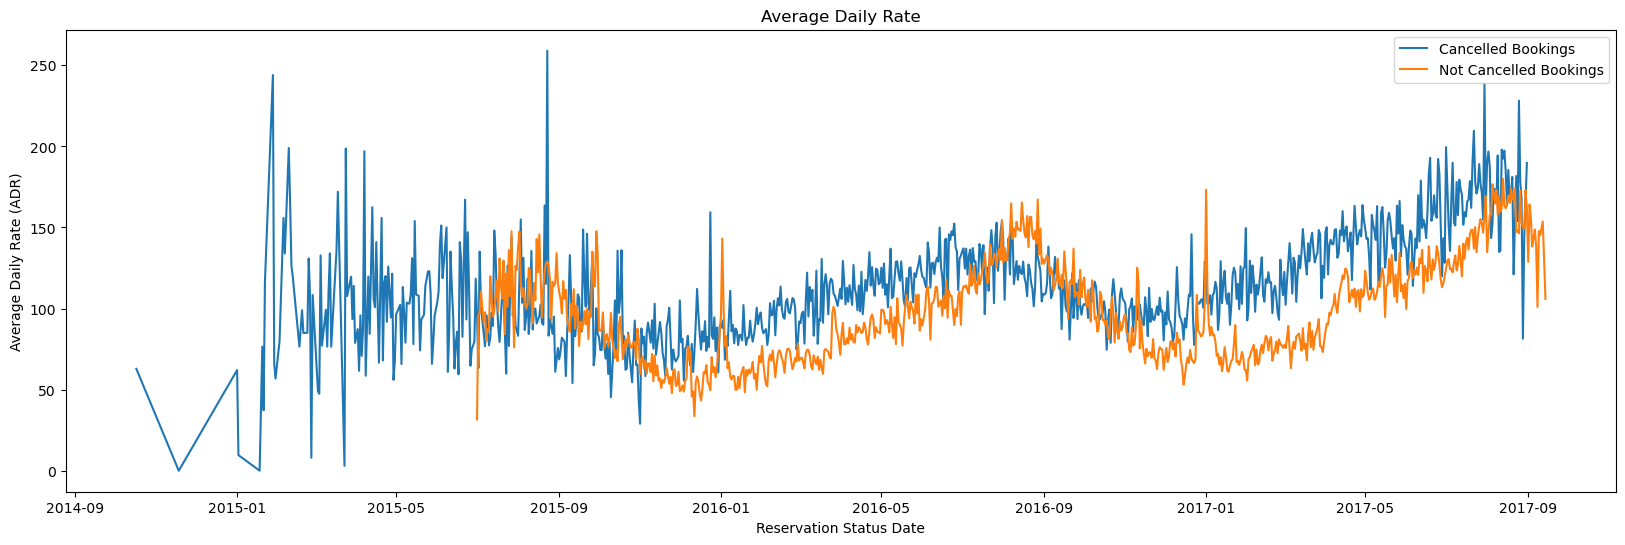

In [265]:


# Step 1: Process cancelled data
cancelled_data = df[df['is_canceled'] == 1]
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Step 2: Process not cancelled data
not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Step 3: Plot the data
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Cancelled Bookings')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Cancelled Bookings')
plt.legend()
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


Since there is non uniform spread visible from 2014 to 2015 we will crop the dataset from 2016 to 2017 for better understanding

In [266]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]


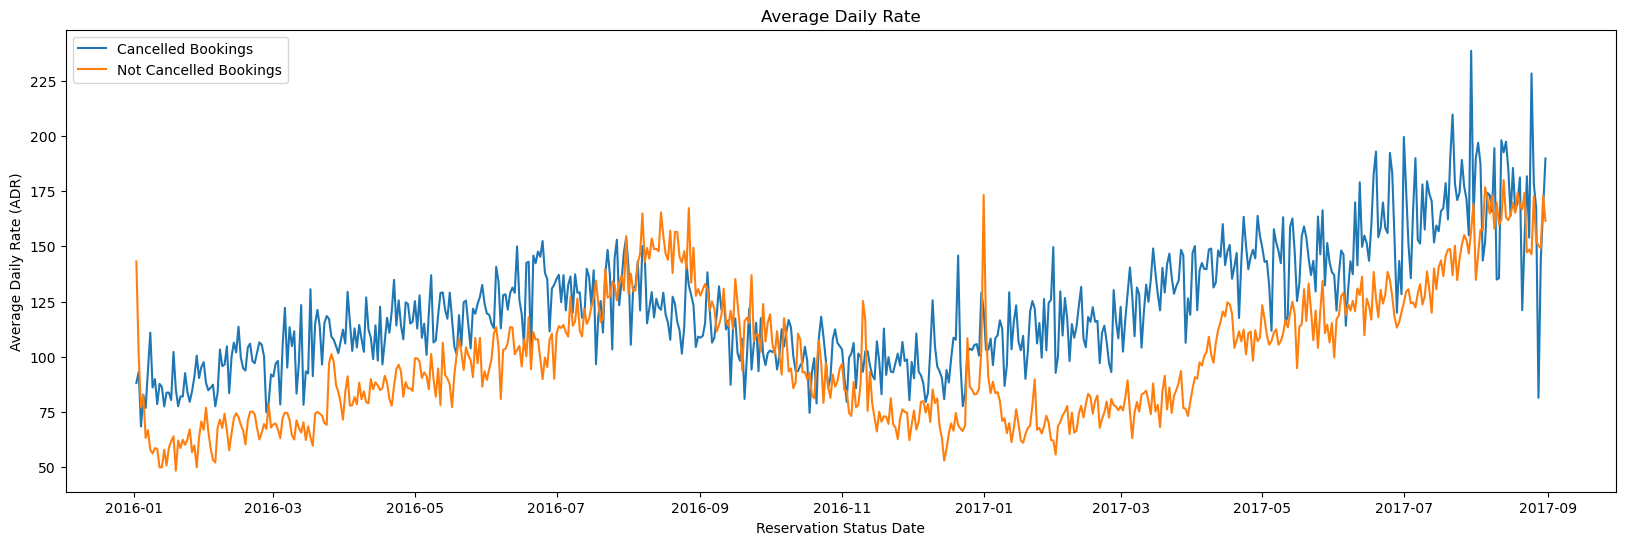

In [267]:
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Cancelled Bookings')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Cancelled Bookings')
plt.legend()
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

###### As ADR is increased the Cancellation (Cancelled Bookings) also increases thereby indicating higher the price higher the cancellation